# Importing Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_columns",40)

# Project 
## World University Ranking Prediction

In [129]:
df=pd.read_csv(r"2026 QS World University Rankings.csv")

# Data Info

In [130]:
df.head()

,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,AR RANK,ER SCORE,ER RANK,FSR SCORE,FSR RANK,CPF SCORE,CPF RANK,IFR SCORE,IFR RANK,ISR SCORE,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,100.0,4,100.0,2,100.0,16,100.0,7,100.0,63,91.6,153,92.3,130,94.1,98,100.0,7,93.8,33,100
1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,99.6,22,100.0,9,99.3,42,95.0,69,100.0,74,100.0,35,100.0,22,97.5,28,95.9,68,98.3,7=,99.4
2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,5,100.0,3,100.0,17,99.7,24,94.2,188,73.5,261,76.1,230,96.5,49,100.0,2,95.4,19=,98.9
3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,100.0,2,100.0,4,100.0,9,91.0,98,98.8,132,98.6,80,98.7,67,100.0,1,100.0,3,77.9,198=,97.9
4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,1,100.0,1,98.3,50,100.0,1,79.1,300,81.4,217,60.6,335,99.4,8,100.0,1,77.8,201=,97.7


In [131]:
df.shape

(1501, 30)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   2026 Rank          1501 non-null   object 
 1   Previous Rank      1389 non-null   object 
 2   Institution Name   1501 non-null   object 
 3   Country/Territory  1501 non-null   object 
 4   Region             1501 non-null   object 
 5   Size               1500 non-null   object 
 6   Focus              1501 non-null   object 
 7   Research           1500 non-null   object 
 8   Status             1454 non-null   object 
 9   AR SCORE           1501 non-null   float64
 10  AR RANK            1501 non-null   object 
 11  ER SCORE           1501 non-null   float64
 12  ER RANK            1501 non-null   object 
 13  FSR SCORE          1501 non-null   float64
 14  FSR RANK           1501 non-null   object 
 15  CPF SCORE          1501 non-null   float64
 16  CPF RANK           1501 

# Data Handling & Cleaning

In [133]:
# Data cleaning
df.replace("—", np.nan, inplace=True)
df['Overall SCORE'] = pd.to_numeric(df['Overall SCORE'], errors='coerce')
df['Previous Rank'] = pd.to_numeric(df['Previous Rank'], errors='coerce')
df['2026 Rank'] = df['2026 Rank'].str.replace("=", "")
df['2026 Rank'] = df['2026 Rank'].str.extract(r'(\d+)', expand=False).astype(float)

# Drop rank columns
drop_cols = [col for col in df.columns if 'RANK' in col]
df.drop(columns=drop_cols, inplace=True)

# Handle missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = SimpleImputer(strategy='mean').fit_transform(df[num_cols])
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


# Visualization & Machine Learning

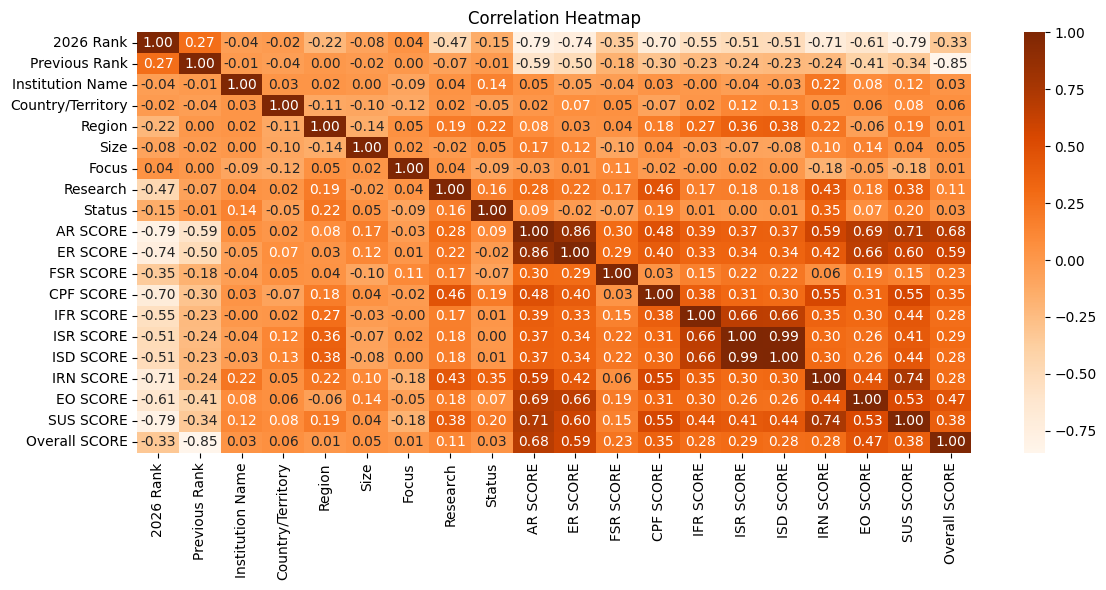

Linear Regression RMSE: 4.445518752589329
Linear Regression R^2: 0.8705289231036601
Random Forest RMSE: 0.17107346248938826
Random Forest R^2: 0.999808268637648


In [139]:
# Encode categorical features
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# EDA
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), cmap='Oranges', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Optional (uncomment for interactive plots)
# px.scatter_matrix(df[num_cols], title="Scatter Matrix of Numerical Features").show()

# Machine Learning
X = df.drop(columns=['Overall SCORE'])
y = df['Overall SCORE']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluation
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Linear Regression R^2:", r2_score(y_test, lr_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest R^2:", r2_score(y_test, rf_pred))